In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
from scipy.stats import qmc

In [2]:
# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 3.0
dt = 5.0e-3
nt = int(tf/dt)
xmin = -1; xmax = 1
ymin = -1; ymax = 1
dims=(nx,ny)

# POD basis
num_basis=np.array([3,4,5,6])
print('num_basis {}'.format(num_basis))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_EDS_result = "../__result/ex9_advection/ex9_POD_EDS_gappy_result.p"
file_name_SVD="../__model/ex9_advection/ex9_SVD.p"

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

num_basis [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]


# gappyPOD

# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]
# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]


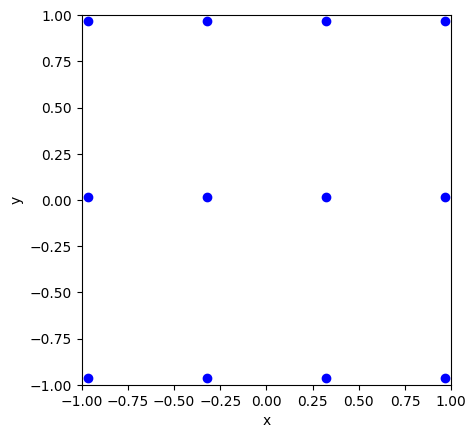

In [3]:
# equally spaced
msmt_i,msmt_j=np.meshgrid([1,30,58],[1,20,39,58],indexing='xy')
msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

num_msmt=len(msmt_idx)
print("# of measurments: {}".format(num_msmt))
print(msmt_idx)

# plot measuremnt positions
plt.figure()
plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
plt.axis('square')
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("../__result/ex9_advection/ex9_POD_EDS_{}_samples.png".format(num_msmt))
print("# of measurments: {}".format(len(msmt_idx)))
print(msmt_idx)

# of POD basis is 3
# of measurments: 12
[  61   90  118 1201 1230 1258 2341 2370 2398 3481 3510 3538]


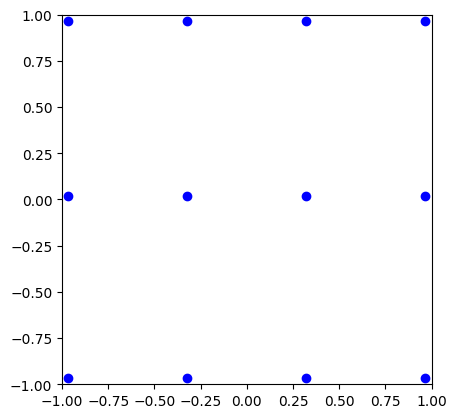

Param is 75
Time elapsed: 0.8915622234344482 sec
average relative error of u: 43.84596278252962%
maximum relative error of u: 87.03190818625261%

Param is 76
Time elapsed: 0.8171610832214355 sec
average relative error of u: 44.65478257313079%
maximum relative error of u: 88.66261869585678%

Param is 77
Time elapsed: 0.7773706912994385 sec
average relative error of u: 45.466310029092476%
maximum relative error of u: 90.2969649068997%

Param is 78
Time elapsed: 0.7767159938812256 sec
average relative error of u: 46.28024623794402%
maximum relative error of u: 91.93402631682717%

Param is 79
Time elapsed: 0.6235051155090332 sec
average relative error of u: 47.09627604841833%
maximum relative error of u: 93.57291266006025%

Param is 80
Time elapsed: 0.42588353157043457 sec
average relative error of u: 47.91404788630822%
maximum relative error of u: 95.21257812848589%

Param is 81
Time elapsed: 0.6025519371032715 sec
average relative error of u: 48.733159937424645%
maximum relative error of

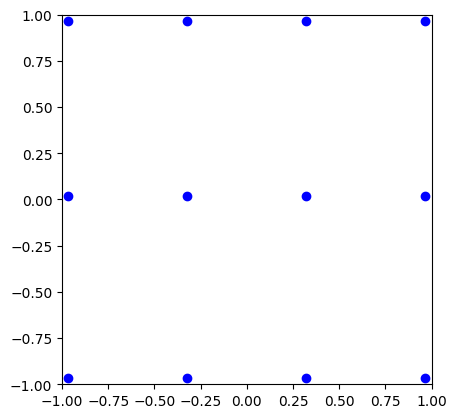

Param is 75
Time elapsed: 0.8424110412597656 sec
average relative error of u: 44.9895172700102%
maximum relative error of u: 80.23815854039049%

Param is 76
Time elapsed: 0.7255206108093262 sec
average relative error of u: 45.862885342850554%
maximum relative error of u: 81.83144102074694%

Param is 77
Time elapsed: 0.8089416027069092 sec
average relative error of u: 46.74043259913393%
maximum relative error of u: 83.43187724659501%

Param is 78
Time elapsed: 0.6880812644958496 sec
average relative error of u: 47.621819399550816%
maximum relative error of u: 85.0386532015705%

Param is 79
Time elapsed: 0.7181577682495117 sec
average relative error of u: 48.506700253653165%
maximum relative error of u: 86.65094000868828%

Param is 80
Time elapsed: 0.9173376560211182 sec
average relative error of u: 49.39463068844695%
maximum relative error of u: 88.26777586061401%

Param is 81
Time elapsed: 0.7894775867462158 sec
average relative error of u: 50.28510327553518%
maximum relative error of 

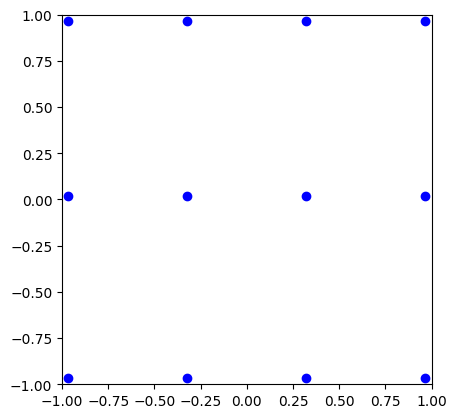

Param is 75
Time elapsed: 0.915787935256958 sec
average relative error of u: 46.29367743791272%
maximum relative error of u: 74.47541630282845%

Param is 76
Time elapsed: 1.015594244003296 sec
average relative error of u: 45.32608930718563%
maximum relative error of u: 72.52424914171267%

Param is 77
Time elapsed: 1.0389955043792725 sec
average relative error of u: 44.28751808888512%
maximum relative error of u: 70.4329791963369%

Param is 78
Time elapsed: 0.9720580577850342 sec
average relative error of u: 43.17848948050379%
maximum relative error of u: 68.20071288170352%

Param is 79
Time elapsed: 0.9620029926300049 sec
average relative error of u: 41.99990825874866%
maximum relative error of u: 65.82728148574417%

Param is 80
Time elapsed: 0.9089033603668213 sec
average relative error of u: 40.75290316456409%
maximum relative error of u: 63.31218145472503%

Param is 81
Time elapsed: 1.0162239074707031 sec
average relative error of u: 39.43897243924771%
maximum relative error of u: 6

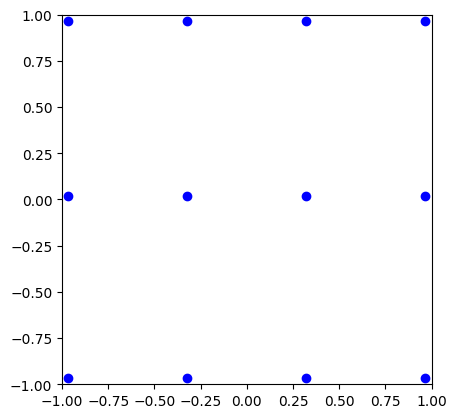

Param is 75
Time elapsed: 0.9858384132385254 sec
average relative error of u: 50.7706802497319%
maximum relative error of u: 85.78723738206641%

Param is 76
Time elapsed: 1.0451469421386719 sec
average relative error of u: 49.73637841034044%
maximum relative error of u: 83.8163320891295%

Param is 77
Time elapsed: 0.9698095321655273 sec
average relative error of u: 48.62407489882642%
maximum relative error of u: 81.69628715868245%

Param is 78
Time elapsed: 0.9557862281799316 sec
average relative error of u: 47.434026064082616%
maximum relative error of u: 79.4260512942134%

Param is 79
Time elapsed: 0.9057440757751465 sec
average relative error of u: 46.16678581278493%
maximum relative error of u: 77.00525775685054%

Param is 80
Time elapsed: 1.0267484188079834 sec
average relative error of u: 44.82325602193199%
maximum relative error of u: 74.43342656493158%

Param is 81
Time elapsed: 0.9227092266082764 sec
average relative error of u: 43.40444642417743%
maximum relative error of u: 

In [4]:
solution=np.zeros((len(num_basis),len(FOM_parameters),nt+1,nx*ny))
avg_rel_err=np.zeros((len(num_basis),len(FOM_parameters)))
rel_err=np.zeros((len(num_basis),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(num_basis),len(FOM_parameters)))

with open(file=file_name_SVD, mode='rb') as ff:  
    SVD = pickle.load(ff)

for ii in range(len(num_basis)):
    POD_basis=num_basis[ii]
    print("# of POD basis is {}".format(POD_basis))
    
    # equally spaced
    msmt_i,msmt_j=np.meshgrid([1,30,58],[1,20,39,58],indexing='xy')
    msmt_idx = np.sort(np.ravel_multi_index((msmt_j.flatten(),msmt_i.flatten()),dims))

    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()
    
    # Basis matrix
    phi_u = SVD['U'][:,:POD_basis]

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('../__data/ex9_advection/ex9_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))
        print()

        # save result
        solution[ii,jj]=u_gappyPOD
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyPOD
        elapsed_time[ii,jj]=t_elapsed_gappyPOD
    
results={'solution':solution,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_EDS_result, mode='wb') as ff:
    pickle.dump(results, ff)

In [5]:
print(num_basis)
idx=[0,1,2,3]
num_basis[idx]

[3 4 5 6]


array([3, 4, 5, 6])

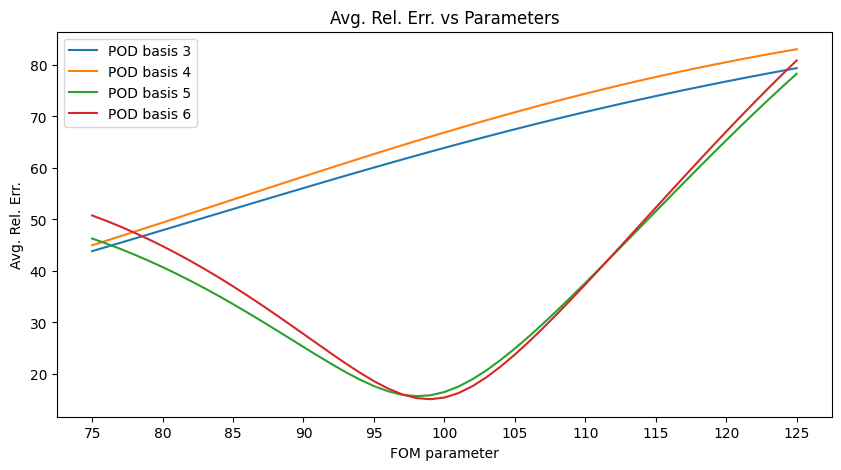

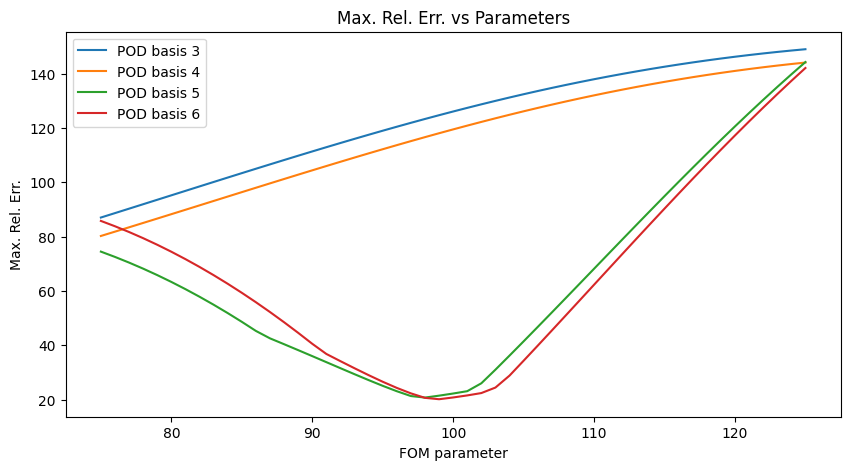

In [6]:
# with open(file=file_path_gappy_EDS_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_EDS_avg_rel_err.png")

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_EDS_max_rel_err.png")

In [7]:
idx=[3]
num_basis[idx]

array([6])

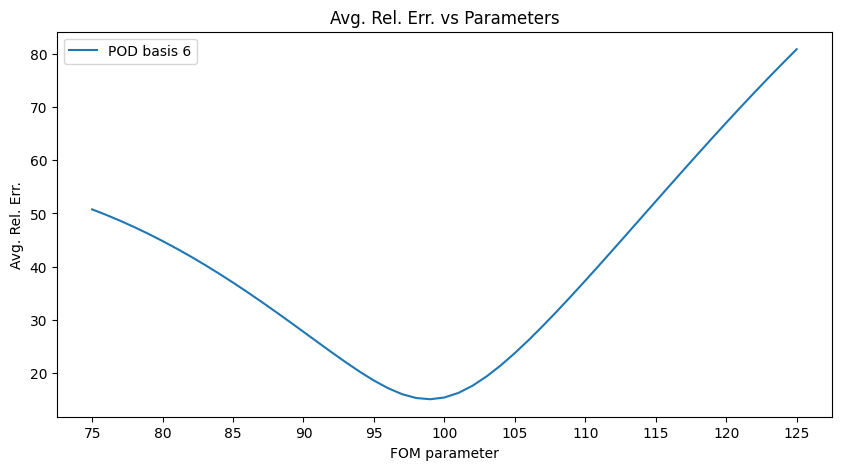

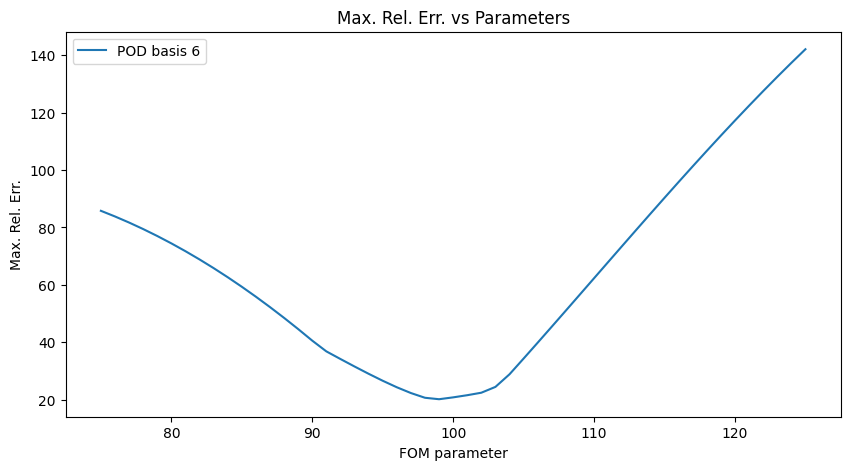

In [8]:
# with open(file=file_path_gappy_EDS_result, mode='rb') as ff:
#     results=pickle.load(ff)    

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:   
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_EDS_avg_rel_err.png".format(int(num_basis[idx])))

# figure rel.err vs data points
plt.figure(figsize=(10,5))
plt_inter=1
for i in idx:   
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD basis "+str(POD_basis) for POD_basis in num_basis[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_EDS_max_rel_err.png".format(int(num_basis[idx])))

In [9]:
print(num_basis)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


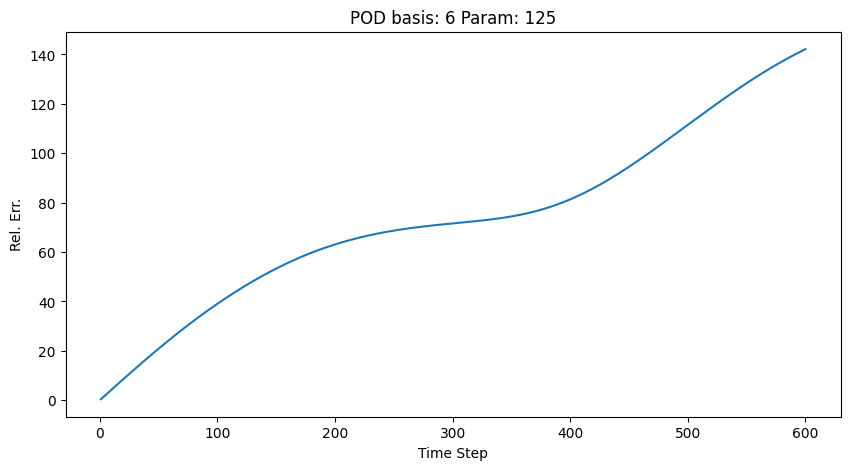

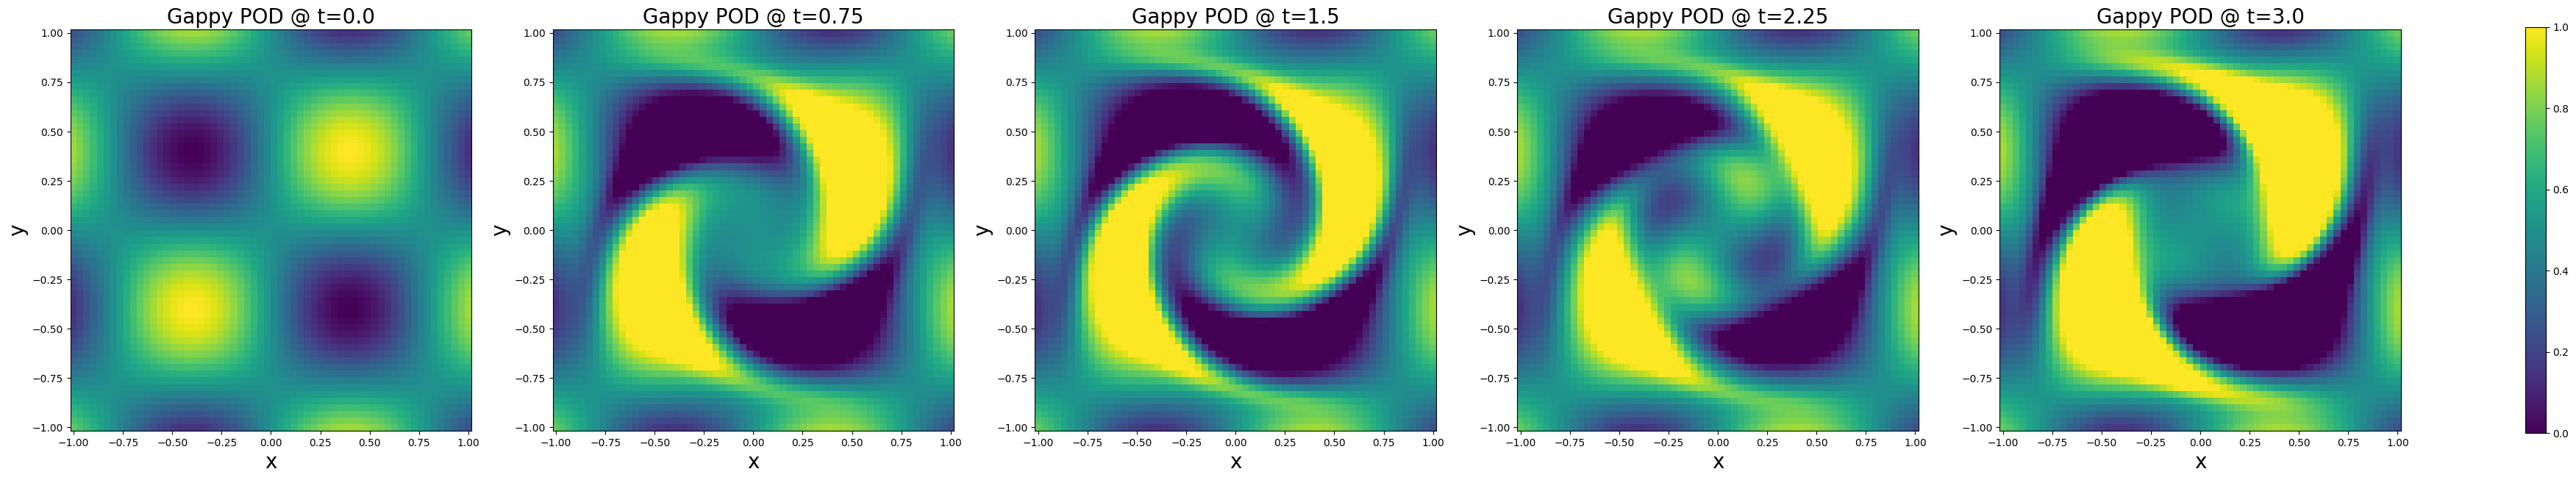

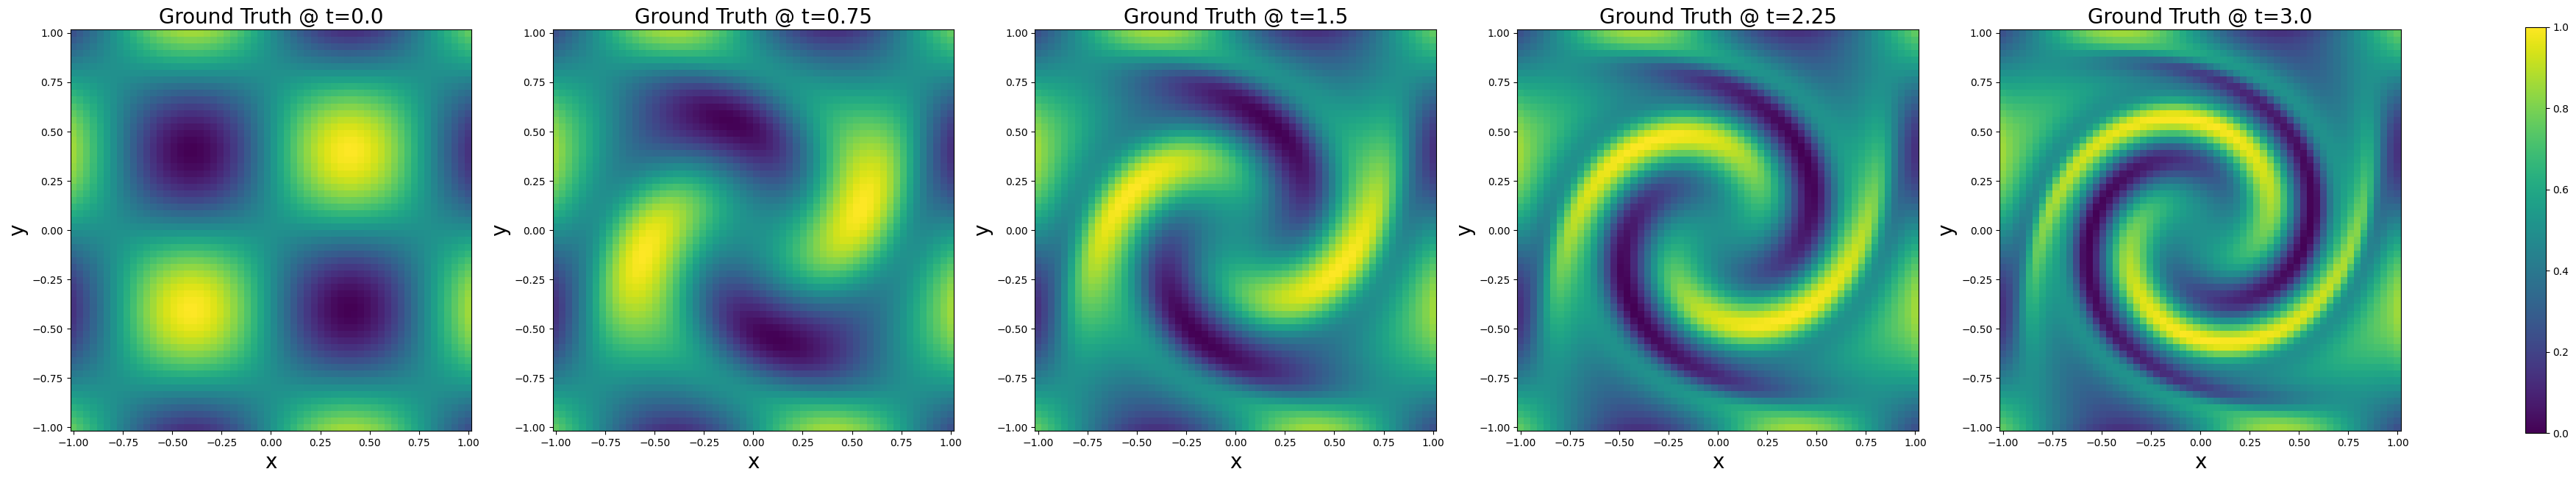

In [10]:
# figure rel.err vs at given param and POD basis
i=3;j=-1
POD_basis=num_basis[i]                 
param=FOM_parameters[j]

u_gappyPOD=results['solution'][i,j]

ex = np.load('../__data/ex9_advection/ex9_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("POD basis: {} Param: {}".format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy POD @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex9_advection/ex9_POD_{}_SOL.png".format(POD_basis))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("../__result/ex9_advection/ex9_ground_truth.png")